### Hierarchical clustering

In this example I demonstrate the hierarchical clustering with the iris dataset. The "ggfortify" package is used to plot the outcome. 

Step-by-step guide:
1. Standardize: it is recommended to standardize X so that each variable has unit variance.
2. Hierarchical cluster: use the "fastcluster" package
3. Plot the result: by using the principal component analysis (PCA) to plot on a 2D graph.

In [21]:
#install.packages("ggfortify")
#install.packages("fastcluster")
library(ggfortify)
library(fastcluster)

##### The original clusters

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


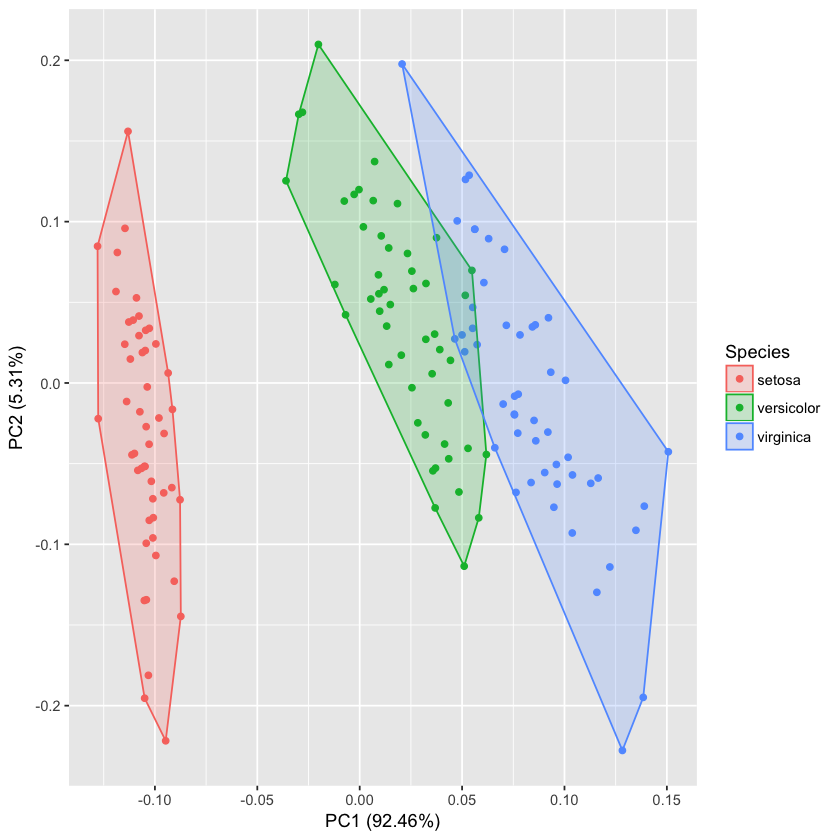

In [6]:
df <- iris[c(1, 2, 3, 4)]
autoplot(prcomp(df), data = iris, colour = 'Species',frame = TRUE)
head(iris)

##### Data preparation: standardize

In [3]:
set.seed( 2 )
iris.sd<-scale(iris[,1:4])     # mean and sd
head(iris.sd)
dim(iris.sd)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
-0.8976739,1.01560199,-1.335752,-1.311052
-1.1392005,-0.13153881,-1.335752,-1.311052
-1.3807271,0.32731751,-1.392399,-1.311052
-1.5014904,0.09788935,-1.279104,-1.311052
-1.0184372,1.24503015,-1.335752,-1.311052
-0.5353840,1.93331463,-1.165809,-1.048667


[1] 150   4

##### Build the hierarchical tree

The function "hclust" in the "fastcluster" package performs the same interface as 'hclust' in the 'stats' package, but with much faster algorithms. Also, "hclust.vector" can perform fast hierarchical, agglomerative clustering of vector data

The "method" opion specifies the agglomeration method to be used. There are four options: "single", "ward", "centroid" or "median". The function can work as long as an unambiguous abbreviation of the method is specified.

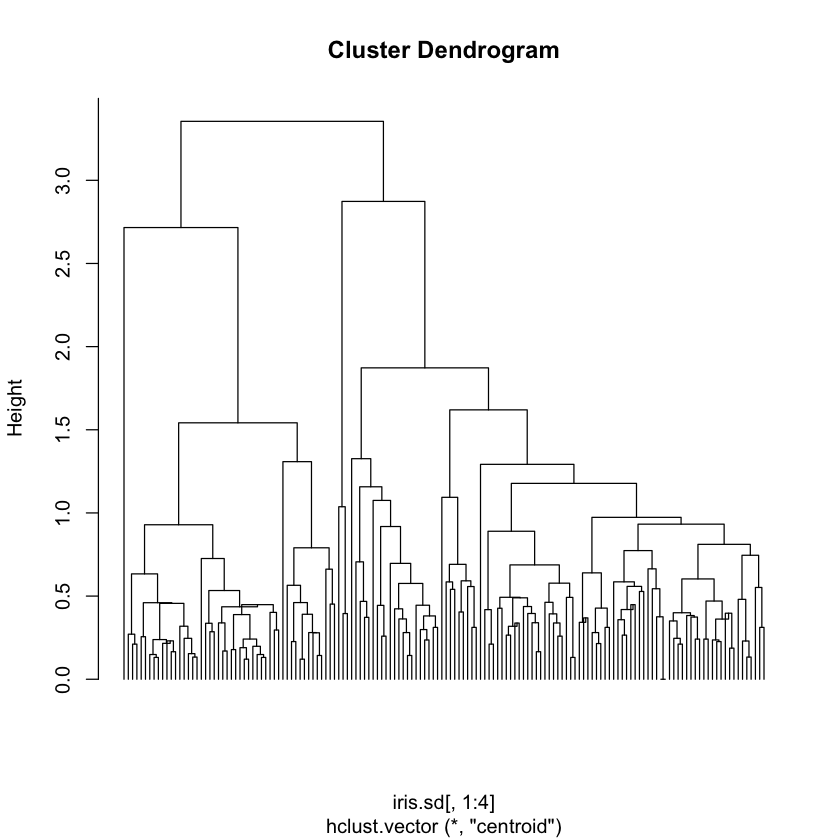

In [20]:
hc <- hclust.vector(iris.sd[,1:4], "cen")
plot(hc, labels = FALSE, hang = -1)

It will be helpful to understand cutting the tree at which level. The 5-cluster version seems a good choice.

In [18]:
for (i in 1:10){
  cut_tree <-  cutree(hc, k = i)
  print(table(cut_tree))
}

cut_tree
  1 
150 
cut_tree
  1   2 
 50 100 
cut_tree
 1  2  3 
50 97  3 
cut_tree
 1  2  3  4 
49  1 97  3 
cut_tree
 1  2  3  4  5 
49  1 76 21  3 
cut_tree
 1  2  3  4  5  6 
49  1 67 21  9  3 
cut_tree
 1  2  3  4  5  6  7 
36 13  1 67 21  9  3 
cut_tree
 1  2  3  4  5  6  7  8 
36 13  1 67 20  1  9  3 
cut_tree
 1  2  3  4  5  6  7  8  9 
36 12  1  1 67 20  1  9  3 
cut_tree
 1  2  3  4  5  6  7  8  9 10 
36 12  1  1 66 20  1  9  1  3 


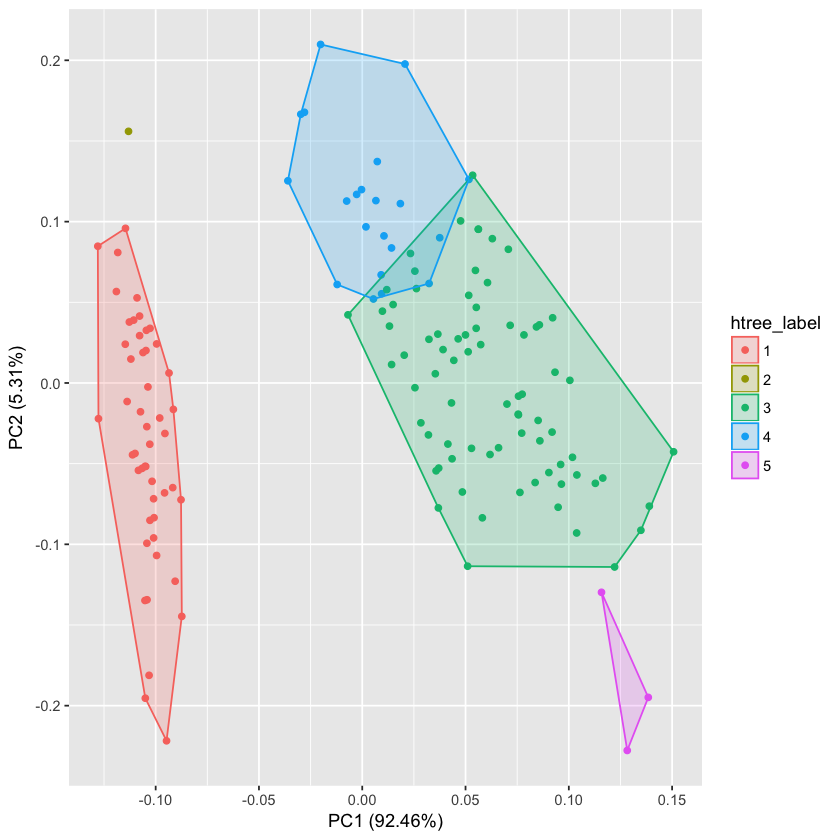

In [24]:
cut_tree <-  cutree(hc, k = 5)
iris_h <-iris
iris_h[,'htree_label'] <- as.factor(cut_tree)
autoplot(prcomp(iris_h[,1:4]), data = iris_h, colour = 'htree_label',frame=TRUE)